# Trabalho 3 - Aprendizado de Máquina Supervisionado

Carolina da Silva Santos 

Nicole Correa Ramos

<br>

## Link para fonte do Dataset
Link: [Synthetic Medical Symptoms and Diagnosis Dataset](
https://www.kaggle.com/datasets/khushikyad001/synthetic-medical-symptoms-and-diagnosis-dataset)



In [ ]:
# ========== BIBLIOTECAS ==========
import numpy as np
import pandas as pd
import kagglehub
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
# ========== DOWNLOAD DO DATASET ==========

# Realiza o download do dataset
path = kagglehub.dataset_download("khushikyad001/synthetic-medical-symptoms-and-diagnosis-dataset")

print("Path to dataset files:", path)

# Busca na pasta criada o .csv do dataset
files = os.listdir(path)
csv_files = [f for f in files if f.endswith('.csv')]

if csv_files:
    csv_file_path = os.path.join(path, csv_files[0])
    print(f"Reading CSV file: {csv_file_path}")
    df = pd.read_csv(csv_file_path)

else:
    print("No CSV files found in the dataset directory.")

# Remoção dos atributos contínuos
df.drop(columns=['age', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'temperature_c', 'oxygen_saturation', 'wbc_count', 'hemoglobin', 'platelet_count', 'crp_level', 'glucose_level'], inplace=True)

# Remoção de algumas classes do dataset
diagnosis_to_remove = ['Influenza', 'COVID-19']
df_filtered = df[~df['diagnosis'].isin(diagnosis_to_remove)]

df = df_filtered.copy()

print(df)

100%|██████████| 83.1k/83.1k [00:00<00:00, 16.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/khushikyad001/synthetic-medical-symptoms-and-diagnosis-dataset/versions/1
Reading CSV file: /root/.cache/kagglehub/datasets/khushikyad001/synthetic-medical-symptoms-and-diagnosis-dataset/versions/1/synthetic_medical_symptoms_dataset.csv
      gender  fever  cough  fatigue  headache  muscle_pain  nausea  vomiting  \
0     Female      1      0        2         0            0       3         0   
1       Male      0      0        1         0            1       0         1   
4     Female      0      0        0         0            2       3         1   
5       Male      1      0        0         0            3       0         0   
6       Male      0      3        1         2            2       1         3   
...      ...    ...    ...      ...       ...          ...     ...       ...   
2992  Female      1      0        1         0            3       0         3   
2995    Male      3      0        1         2   

In [ ]:
# ========== DESENVOLVIMENTO pt.1 ==========
# Separação da Matriz de Atributos (X) e do Vetor de Classes (y)

# y será a coluna do diagnóstico (diagnosis)
y = df['diagnosis']

# X será todas as outras colunas
X = df.drop('diagnosis', axis='columns')

print("Matriz de Atributos (X)")
display(X)

print("\nVetor de Classes (y)")
display(y)

Matriz de Atributos (X)


,gender,fever,cough,fatigue,headache,muscle_pain,nausea,vomiting,diarrhea,skin_rash,loss_smell,loss_taste
0,Female,1,0,2,0,0,3,0,3,0,0,3
1,Male,0,0,1,0,1,0,1,0,2,0,0
4,Female,0,0,0,0,2,3,1,1,1,0,0
5,Male,1,0,0,0,3,0,0,0,3,0,1
6,Male,0,3,1,2,2,1,3,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Female,1,0,1,0,3,0,3,2,0,1,2
2995,Male,3,0,1,2,0,0,1,0,2,1,0
2996,Male,2,2,0,2,1,2,1,1,3,0,1
2997,Female,0,0,2,1,1,3,1,0,0,1,0



Vetor de Classes (y)


,diagnosis
0,Dengue
1,Dengue
4,Dengue
5,Dengue
6,Dengue
...,...
2992,Dengue
2995,Malaria
2996,Pneumonia
2997,Malaria


In [ ]:
# ========== DESENVOLVIMENTO pt.2 ==========
# Transformação de Atributos Nominais em Binários

# Coluna com atributo categórico
categorical_col = ['gender', 'fever', 'cough', 'fatigue', 'headache', 'muscle_pain', 'nausea', 'vomiting', 'diarrhea', 'skin_rash', 'loss_smell', 'loss_taste']

# Uso do OneHotEncoder para transformar em atributo binário
ohe = OneHotEncoder(sparse_output=False)
X_binary = ohe.fit_transform(X[categorical_col])

# Novo dataframe com as colunas codificadas
df_binary = pd.DataFrame(X_binary, columns=ohe.get_feature_names_out(categorical_col), index=X.index)

# Remover a coluna original categórica de X
X_no_categorical = X.drop(columns=categorical_col)

# União das novas colunas codificadas com o restante de X
X_no_categorical = pd.concat([X_no_categorical, df_binary], axis='columns')

print("Matriz de Atributos (X) após One-Hot Encoding")
display(X_no_categorical)



Matriz de Atributos (X) após One-Hot Encoding


,gender_Female,gender_Male,fever_0,fever_1,fever_2,fever_3,cough_0,cough_1,cough_2,cough_3,...,skin_rash_2,skin_rash_3,loss_smell_0,loss_smell_1,loss_smell_2,loss_smell_3,loss_taste_0,loss_taste_1,loss_taste_2,loss_taste_3
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2995,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2997,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# ========== DESENVOLVIMENTO pt.3 ==========
# Divisão do Conjunto de Dados em Treinamento e Testes

# Parâmetros
teste_size = 0.3  # Serão usados 30% dos dados para testes e 70% para treinamento
random_state = 42  # Valor para garantir reprodutibilidade
stratify = y  # Garante proporção das classes em y

X_train, X_test, y_train, y_test = train_test_split(X_no_categorical, y, test_size=teste_size, random_state=random_state, stratify=stratify)

print("Dimensão dos conjuntos após a divisão:")
print(f"X_train -> {X_train.shape}")
print(f"X_test -> {X_test.shape}")
print(f"y_train -> {y_train.shape}")
print(f"y_test -> {y_test.shape}")

print("\nX_train:")
display(X_train)
print("\ny_train:")
display(y_train)


Dimensão dos conjuntos após a divisão:
X_train -> (1078, 46)
X_test -> (463, 46)
y_train -> (1078,)
y_test -> (463,)

X_train:


,gender_Female,gender_Male,fever_0,fever_1,fever_2,fever_3,cough_0,cough_1,cough_2,cough_3,...,skin_rash_2,skin_rash_3,loss_smell_0,loss_smell_1,loss_smell_2,loss_smell_3,loss_taste_0,loss_taste_1,loss_taste_2,loss_taste_3
2122,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2424,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1148,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1987,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1757,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1208,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
807,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2894,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0



y_train:


,diagnosis
2122,Pneumonia
2424,Malaria
1148,Dengue
1987,Pneumonia
1757,Malaria
...,...
499,Dengue
1208,Dengue
807,Pneumonia
2894,Malaria


In [ ]:
# ========== DESENVOLVIMENTO pt.4 ==========
# Aplicar o algoritmo de indução de árvore de decisão

# Cria o classificador, utilizando criterion='entropy'
clf = tree.DecisionTreeClassifier(criterion='entropy')

# Treina o classificador para gerar o modelo com os parâmetros especificados
clf.fit(X_train, y_train)

print("Árvore treinada com sucesso.")

Árvore treinada com sucesso.


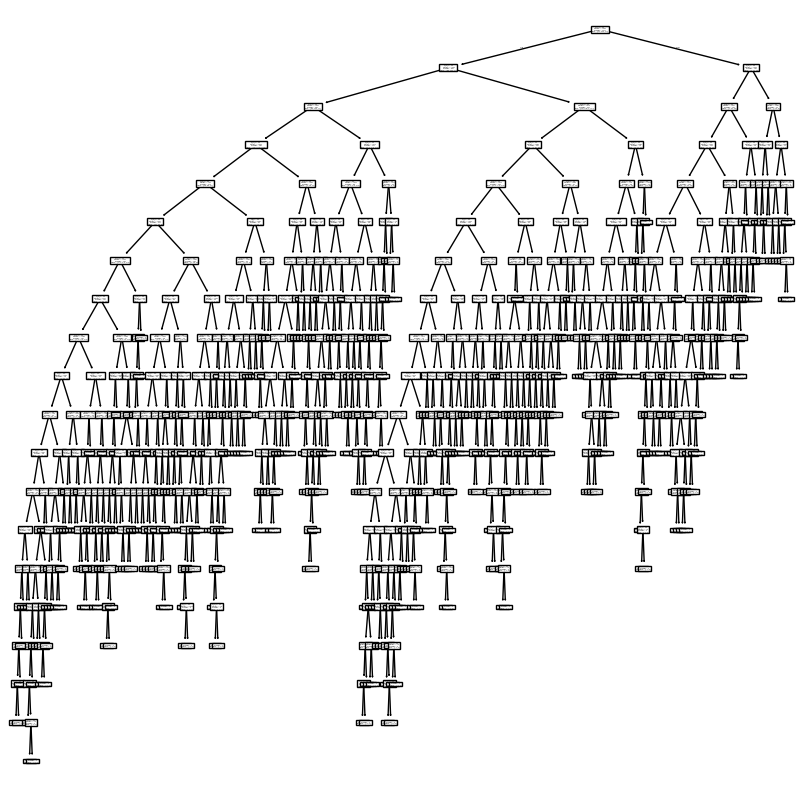

In [ ]:
# ========== DESENVOLVIMENTO pt.5 ==========
# Gerar a figura da árvore de decisão
fig = plt.figure(figsize=(10,10))
fig = tree.plot_tree(clf)

plt.show()

In [ ]:
# ========== DESENVOLVIMENTO pt.6 ==========
# Fazer a classificação dos dados de teste
predicted = clf.predict(X_test)

<Figure size 800x600 with 0 Axes>

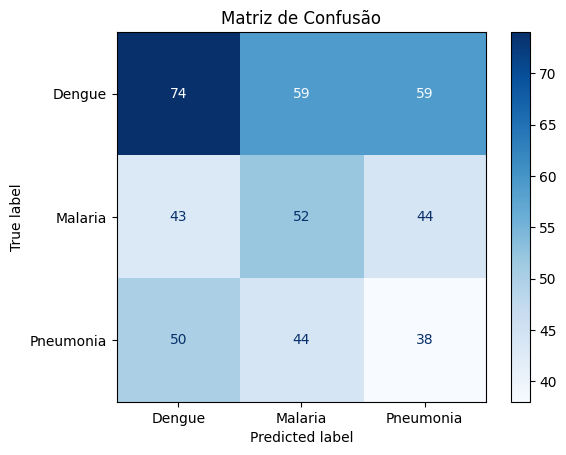

In [ ]:
# ========== DESENVOLVIMENTO pt.7 ==========
# Fazer a avaliação do modelo gerado usando os dados de teste

# === Matriz de confusão ===
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Nomes das classes do problema
class_names = clf.classes_

# Gera a matriz de confusão
matrix = confusion_matrix(y_test, predicted, labels=class_names)

# Plotando a matriz
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=class_names)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


In [ ]:
# === Acurácia ===
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted) * 100

print(f"Acurácia: {accuracy:.2f}%")

Acurácia: 35.42%


In [ ]:
# === Precisão ===
from sklearn.metrics import precision_score

# Calculando a precisão
precision = precision_score(y_test, predicted, average='macro', zero_division = 0) * 100

print(f"Precisão: {precision:.2f}%")

Precisão: 34.94%


In [ ]:
# === Revocação ===
from sklearn.metrics import recall_score

# Calculando a revocação
recall = recall_score(y_test, predicted, average='macro') * 100

print(f"Revocação: {recall:.2f}%")

Revocação: 34.91%


In [ ]:
# === Medida-F ===
from sklearn.metrics import f1_score

# Calculando a medida-F
f1 = f1_score(y_test, predicted, average='macro') * 100

print(f"Medida-F: {f1:.2f}%")

Medida-F: 34.81%
